# Introduction

=======================================================

**Final Project**

Group : 1

Name :  
- Audrey Wanto as Data Engineer

- Jeni Kasturi as Data Scientist

- Taufiqurrahman as Data Analyst

Batch : FTDS_BSD_2

Looking for the best prediction results using the Arima and Sarimax models in this database [Customer Subscription Data]('https://www.kaggle.com/datasets/gsagar12/dspp1/data')

=======================================================

- **Background Information :**

    There is a Customer Subscription Dataset in which there is a collection of data that focuses on subscriptions offering digital products such as bulletins, webinars, and investment recommendations. These feature the sign-up and cancellation dates of customers, call volume activity, subscriber demographic, and information on product pricing.

- **Problem Statement :**

    In this project, we are going to predict the revenue forecast from annual subscription and monthly subscription for the year 2022 and 2023 using the customer subscription dataset. To achieve this, we need to execute analysis and proper segmentation.

- **Objective :**

    The main goal is to produce precise visualizations that depict the performance of subscription-based products in 2022. The steps that will be taken to achieve the goals of this project are:

     - Perform data analysis in Feature Engineering to understand the characteristics of the dataset and carry out stationarity tests on a time series.
     - Analyze `ACF` and `PACF` on product columns in *pivot_train* dataframe.
     - Make a comparison between the `Sarimax` model and the `Arima` model.
     - Make predictions from `Sarimax` and `Arima` models.

---

# Import Libraries

Import all libraries needed in the project.

In [1]:
# import Library
import numpy as np
import pandas as pd
import pickle
import pprint

# Feature Engineering
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# import model
import statsmodels.api as sm
import matplotlib.pyplot as plt  # Importing Matplotlib library for plotting
from statsmodels.tsa.arima.model import ARIMA  # Importing ARIMA model from statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX  # Importing SARIMAX model from statsmodels
from statsmodels.tsa.stattools import adfuller

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

---

# Data Loading

In this data loading section we will load and display a dataset that contains many columns.

Duplicate the data so as not to change the original data, we can see the table display below:

In [2]:
# Load dataset
# import clean data
df = pd.read_csv('cleaned_data.csv')

# Duplicate data ori
df_1 = df.copy()

# display the top ten data
pd.set_option('display.max_columns',None)
df_1.head(10)

,Unnamed: 0,customer_id,age,gender,case_id,date_time,channel,reason,product_id,signup_date_time,cancel_date_time,name,price,billing_cycle,churn,signup_month,signup_year,signup_day,cancel_month,cancel_year,revenue
0,0,C2448,76,female,CC101,2017-01-01 10:32:03,phone,signup,prd_1,2017-01-01 10:35:09,NaN,annual_subscription,1200,12,0,1,2017,1,NaN,NaN,4800.0
1,1,C2449,61,male,CC102,2017-01-01 11:35:47,phone,signup,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,annual_subscription,1200,12,1,1,2017,1,9.0,2021.0,4800.0
2,2,C2450,58,female,CC103,2017-01-01 11:37:09,phone,signup,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,annual_subscription,1200,12,1,1,2017,1,1.0,2019.0,2400.0
3,3,C2452,71,male,CC105,2017-01-01 13:52:22,phone,signup,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,annual_subscription,1200,12,1,1,2017,1,6.0,2021.0,4800.0
4,4,C2453,56,male,CC106,2017-01-01 15:23:02,phone,signup,prd_1,2017-01-01 15:26:14,NaN,annual_subscription,1200,12,0,1,2017,1,NaN,NaN,4800.0
5,5,C2453,56,male,CC43244,2018-09-13 17:47:42,phone,support,prd_1,2017-01-01 15:26:14,NaN,annual_subscription,1200,12,0,1,2017,1,NaN,NaN,4800.0
6,6,C2454,53,male,CC107,2017-01-01 15:30:36,phone,signup,prd_1,2017-01-01 15:35:03,2021-06-01 17:09:40,annual_subscription,1200,12,1,1,2017,1,6.0,2021.0,4800.0
7,7,C2454,53,male,CC32581,2018-05-31 16:44:29,phone,support,prd_1,2017-01-01 15:35:03,2021-06-01 17:09:40,annual_subscription,1200,12,1,1,2017,1,6.0,2021.0,4800.0
8,8,C2455,53,female,CC108,2017-01-02 08:57:09,phone,signup,prd_1,2017-01-02 09:01:31,NaN,annual_subscription,1200,12,0,1,2017,2,NaN,NaN,4800.0
9,9,C2455,53,female,CC7034,2017-05-15 15:54:08,phone,support,prd_1,2017-01-02 09:01:31,NaN,annual_subscription,1200,12,0,1,2017,2,NaN,NaN,4800.0


In [3]:
# display the bottom ten data
pd.set_option('display.max_columns',None)
df_1.tail(10)

,Unnamed: 0,customer_id,age,gender,case_id,date_time,channel,reason,product_id,signup_date_time,cancel_date_time,name,price,billing_cycle,churn,signup_month,signup_year,signup_day,cancel_month,cancel_year,revenue
330502,330502,C510062,59,male,CC330331,2021-12-30 17:45:45,phone,support,prd_2,2021-12-24 11:45:53,NaN,monthly_subscription,125,1,0,12,2021,24,NaN,NaN,0.0
330503,330503,C510158,59,female,CC328810,2021-12-26 11:04:28,phone,support,prd_2,2021-12-24 16:55:01,NaN,monthly_subscription,125,1,0,12,2021,24,NaN,NaN,0.0
330504,330504,C510173,67,male,CC330280,2021-12-30 16:34:12,email,support,prd_2,2021-12-24 18:38:58,NaN,monthly_subscription,125,1,0,12,2021,24,NaN,NaN,0.0
330505,330505,C510181,62,male,CC329364,2021-12-27 17:14:54,phone,support,prd_2,2021-12-24 19:34:07,NaN,monthly_subscription,125,1,0,12,2021,24,NaN,NaN,0.0
330506,330506,C510248,64,female,CC330508,2021-12-31 14:52:04,phone,support,prd_2,2021-12-25 15:16:59,NaN,monthly_subscription,125,1,0,12,2021,25,NaN,NaN,0.0
330507,330507,C510298,68,male,CC330226,2021-12-30 14:31:00,phone,support,prd_2,2021-12-26 06:02:25,NaN,monthly_subscription,125,1,0,12,2021,26,NaN,NaN,0.0
330508,330508,C510328,55,female,CC329804,2021-12-29 11:32:22,phone,support,prd_2,2021-12-26 12:04:00,NaN,monthly_subscription,125,1,0,12,2021,26,NaN,NaN,0.0
330509,330509,C510553,69,male,CC330303,2021-12-30 17:15:10,phone,support,prd_2,2021-12-27 16:02:20,NaN,monthly_subscription,125,1,0,12,2021,27,NaN,NaN,0.0
330510,330510,C510580,57,female,CC330235,2021-12-30 14:59:24,phone,support,prd_2,2021-12-27 17:07:58,NaN,monthly_subscription,125,1,0,12,2021,27,NaN,NaN,0.0
330511,330511,C511159,60,female,CC330395,2021-12-31 10:36:30,phone,support,prd_2,2021-12-30 15:24:47,NaN,monthly_subscription,125,1,0,12,2021,30,NaN,NaN,0.0


After displaying the dataset, the next step is to first display a list of column names in our table so that we can easily analyze which columns we may not need data for.

In [4]:
# To display a list of column names in the table
df_1.columns

Index(['Unnamed: 0', 'customer_id', 'age', 'gender', 'case_id', 'date_time',
       'channel', 'reason', 'product_id', 'signup_date_time',
       'cancel_date_time', 'name', 'price', 'billing_cycle', 'churn',
       'signup_month', 'signup_year', 'signup_day', 'cancel_month',
       'cancel_year', 'revenue'],
      dtype='object')

After we display the list of column names, the next step is to look at the data type of each column, whether the data type matches the column or not.

In [5]:
# show info data
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330512 entries, 0 to 330511
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        330512 non-null  int64  
 1   customer_id       330512 non-null  object 
 2   age               330512 non-null  int64  
 3   gender            330512 non-null  object 
 4   case_id           330512 non-null  object 
 5   date_time         330512 non-null  object 
 6   channel           330512 non-null  object 
 7   reason            330512 non-null  object 
 8   product_id        330512 non-null  object 
 9   signup_date_time  330512 non-null  object 
 10  cancel_date_time  76686 non-null   object 
 11  name              330512 non-null  object 
 12  price             330512 non-null  int64  
 13  billing_cycle     330512 non-null  int64  
 14  churn             330512 non-null  int64  
 15  signup_month      330512 non-null  int64  
 16  signup_year       33

From the information above, we can conclude that the data obtained contains:
- There are 24 columns
- Type Float(64) 3 columns, Integer(64) 11 columns and object 10 columns
- Has 330512 rows.

After analyzing the dataset, the next step will be processing our data in Feature Engineering.

---

# Feature Engineering

In this section we will carry out the data preparation process to process model training, do a column drop, change the data type in the column, do a split on train and test, do a groupby on train and test, create a function to check stationarity on the train, and display a plot of stationarity results .

In [6]:
# Drop columns that are not needed
df_1 = df_1.drop(columns=['Unnamed: 0'])

Drop the `Unnamed: 0`, `index_y` and `index` columns because we don't need them to predict the `revenue` column.

In [7]:
# Change the data type of the 'signup date_time' and 'cancel date time' columns to datetime
df_1['signup_date_time'] = pd.to_datetime(df_1['signup_date_time'])
df_1['cancel_date_time'] = pd.to_datetime(df_1['cancel_date_time'])

Change the data type in the `signup_date_time` column and the `cancel_date_time` column to the datetime data type to make it easier for us to create prediction models.

In [8]:
# Split between Train set and Test set
train, test = train_test_split(df_1, test_size = 0.2, random_state = 10)
print('Train size: ', train.shape)
print('Test size: ', test.shape)
train.head()

Train size:  (264409, 20)
Test size:  (66103, 20)


,customer_id,age,gender,case_id,date_time,channel,reason,product_id,signup_date_time,cancel_date_time,name,price,billing_cycle,churn,signup_month,signup_year,signup_day,cancel_month,cancel_year,revenue
89224,C112865,57,male,CC240969,2021-05-20 11:11:11,phone,signup,prd_1,2021-05-20 11:16:01,NaT,annual_subscription,1200,12,0,5,2021,20,NaN,NaN,0.0
41770,C43650,52,male,CC75576,2019-05-22 13:43:37,phone,signup,prd_1,2019-05-22 13:48:38,NaT,annual_subscription,1200,12,0,5,2019,22,NaN,NaN,2400.0
71824,C81844,66,female,CC158905,2020-07-12 10:26:12,phone,signup,prd_1,2020-07-12 10:30:13,NaT,annual_subscription,1200,12,0,7,2020,12,NaN,NaN,1200.0
246040,C122262,54,male,CC275506,2021-08-10 13:00:40,phone,signup,prd_2,2021-08-10 13:04:47,NaT,monthly_subscription,125,1,0,8,2021,10,NaN,NaN,500.0
200001,C74142,50,female,CC141641,2020-05-04 10:01:58,phone,signup,prd_2,2020-05-04 10:06:35,NaT,monthly_subscription,125,1,0,5,2020,4,NaN,NaN,2375.0


Divide the dataset into two parts:
- training data (train set)
- test data (test set)

Its function is as training data used to train models, and allows algorithms to learn patterns and relationships contained in our data.

## 1. Train

In [9]:
# Groupby TRAIN set amount of customers
groupby_train = train.groupby([pd.Grouper(key='signup_date_time', freq='MS')])['name'].value_counts().reset_index(name='customers')
groupby_train.columns = ['Signup Date', 'Type', 'Number of Customers']
pivot_train = groupby_train.pivot(values='Number of Customers', index= 'Signup Date', columns = 'Type')
pivot_train.columns = ['Annual Subscription', 'Monthly Subscription']
pivot_train.index.freq = 'MS'
pivot_train.head()

,Annual Subscription,Monthly Subscription
Signup Date,,
2017-01-01,1821,511
2017-02-01,1687,450
2017-03-01,1940,555
2017-04-01,1716,495
2017-05-01,1813,513


From groupby above, its function is to group customer data based on monthly registration date and subscription type (annual or monthly), then convert it into pivot form for further analysis, and display the first few rows of the pivot results.

The next step is check stationarity, whose function is to carry out a stationarity test on a time series. To do this, this function uses the Augmented Dickey-Fuller (ADF) test which is one of the statistical tests commonly used to determine whether a time series is stationary or not.

In [10]:
# Create a function to check stationarity

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [11]:
# Check stationarity of the dataset
check_stationarity(pivot_train['Annual Subscription'])

ADF Statistic: -2.285079
p-value: 0.176825
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594
Non-stationary


In [12]:
# Check stationarity of the dataset
check_stationarity(pivot_train['Monthly Subscription'])

ADF Statistic: 10.618855
p-value: 1.000000
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600
Non-stationary


From the results of the stationarity check above, we can conclude that the two types of subscriptions, both annual and monthly, do not show stationarity based on the ADF test. This indicates that the patterns or characteristics of the number of annual and monthly subscription customers tend not to remain constant over time and may have significant trends or fluctuation patterns. For more details, we can see the pivot display below.

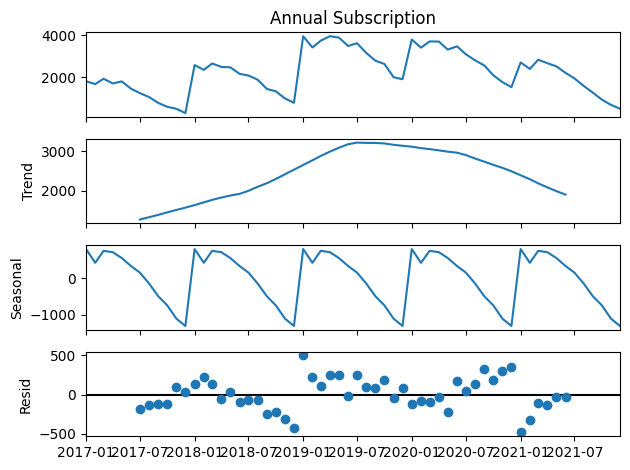

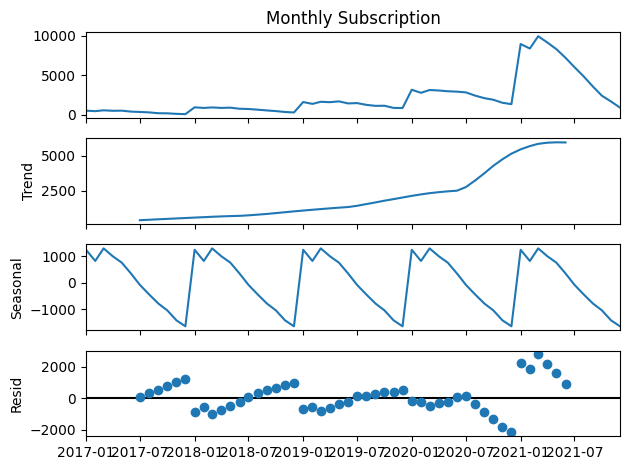

In [13]:
# create a pivot from the results of the check_stationarity 
for product in pivot_train.columns:
    result = seasonal_decompose(pivot_train[product])
    display = result.plot()
    plt.show()

In [14]:
#Augmented Dickey–Fuller train:
print('Results of Dickey Fuller Test:')
dftrain = adfuller(pivot_train['Annual Subscription'], autolag='AIC')

dfoutput = pd.Series(dftrain[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftrain[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -2.285079
p-value                         0.176825
#Lags Used                      0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


From the ADF test results above for annual subscriptions, it is obtained:
- The p-value is 0.176825 which is greater than the significance level of 0.05
- The Test Statistics value (-2.285079) is higher than the critical value at all confidence levels (1%, 5%, and 10%).

Thus, there is not enough evidence to reject the null hypothesis. Therefore, annual subscription data is not classified as stationary.

In [15]:
#Augmented Dickey–Fuller train:
print('Results of Dickey Fuller Test:')
dftrain = adfuller(pivot_train['Monthly Subscription'], autolag='AIC')

dfoutput = pd.Series(dftrain[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftrain[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 10.618855
p-value                         1.000000
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In the ADF test results on monthly subscriptions, it was found:
- very high p-value (1.000000) far exceeding the significance level of 0.05.
- The positive Test Statistics value (10.618855) is also far above the critical values at all confidence levels (1%, 5%, and 10%).

From these results, there is not enough evidence to reject the null hypothesis. Therefore, monthly subscription data is not classified as stationary.

The next step is to perform Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) analysis on each column (product) in the pivot_train DataFrame.

Annual Subscription


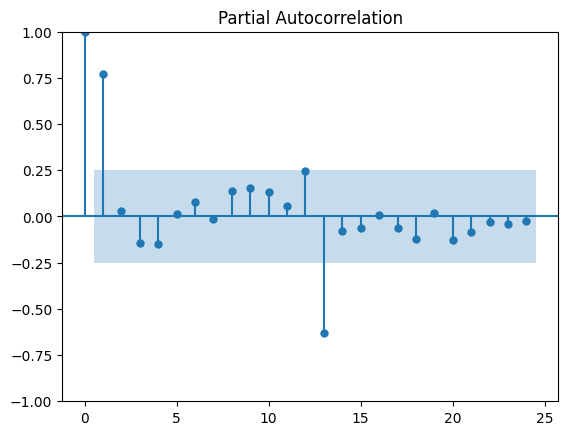

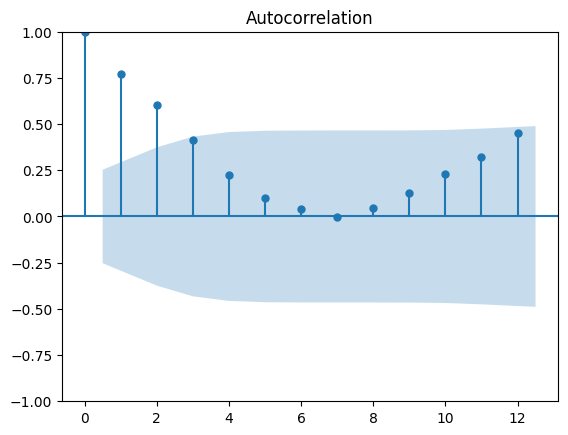

Monthly Subscription


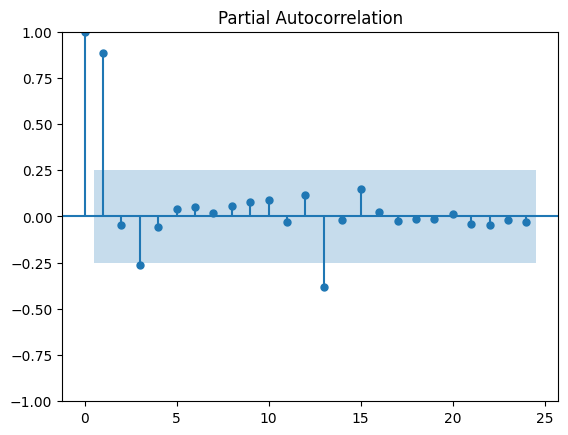

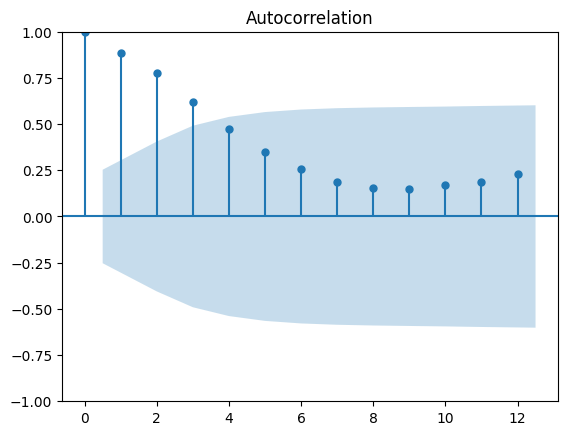

In [16]:
# Analyze ACF and PACF on the product column in the pivot_train dataframe
for product in pivot_train.columns:
    print(product)
    plot_pacf(x=pivot_train[product], lags=24)
    plt.show()
    plot_acf(x=pivot_train[product], lags =12)
    plt.show()

The results of the ACF and PACF analysis will display the correlation pattern between values at different times (lags) in the time series data. ACF and PACF are often used in time series data analysis to determine the appropriate model for forecasting the data. PACF helps in determining the autoregressive (AR) value in the ARIMA model, while ACF helps in determining the moving average (MA) value.

## 2. Test

Pada langkah ini kita akan mempersiapkan data uji (test set) dengan melakukan beberapa langkah pengelompokan dan pivot pada dataset yang bertujuan untuk mengelompokkan dan menyusun ulang data uji berdasarkan tanggal pendaftaran bulanan serta jenis langganan (tahunan dan bulanan) agar siap untuk analisis lebih lanjut atau untuk pembuatan model.

In [17]:
# Groupby test set amount of customers
groupby_test = test.groupby([pd.Grouper(key='signup_date_time', freq='MS')])['name'].value_counts().reset_index(name='customers')
groupby_test.columns = ['Signup Date', 'Type', 'Number of Customers']
pivot_test = groupby_test.pivot(values='Number of Customers', index= 'Signup Date', columns = 'Type')
pivot_test.columns = ['Annual Subscription', 'Monthly Subscription']
pivot_test.index.freq = 'MS'
pivot_test.head()

,Annual Subscription,Monthly Subscription
Signup Date,,
2017-01-01,483,135
2017-02-01,410,101
2017-03-01,462,128
2017-04-01,411,133
2017-05-01,451,119


---

# Model Definition

In this Model Definition we will make a comparison between `Sarimax` and `Arima`.

## A. Sarimax

Basically, SARIMAX is a useful tool for analyzing, modeling and forecasting complex time series data, including data that shows seasonal patterns or non-stationary components.

### - Annual Subscription

The next step is to create and train a SARIMAX model using annual subscription customer data ('Annual Subscription') from training data (pivot_train['Annual Subscription']).

By training this model, we can analyze the performance of the SARIMAX model on annual subscription customer data and obtain information about the suitability of the model to the data as well as optimal parameter settings to use in making predictions.

In [18]:
# Train the SARIMAX model using 'Annual Subscription' data in pivot_train
sarimax_train_annual = SARIMAX(pivot_train['Annual Subscription'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarimax_train_annual_predict = sarimax_train_annual.fit()
# statistics of the model
sarimax_train_annual_predict.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                Annual Subscription   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -332.762
Date:                            Fri, 08 Dec 2023   AIC                            675.524
Time:                                    00:27:55   BIC                            684.775
Sample:                                01-01-2017   HQIC                           679.005
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1796      1.225     -0.147      0.883      -2.581       2.222
ma.L1         -0.0939      1.186     -0.079      0.937      -2.419       2.231
ar.S.L12       0.4738      0.447      1.060      0.289      -0.402       1.350
ma.S.L12      -0.9917     23.827     -0.042      0.967     -47.691      45.708
sigma2      6.788e+04   1.59e+06      0.043      0.966   -3.05e+06    3.19e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                42.88
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.24
Prob(H) (two-sided):                  0.97   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From the results above, the SARIMAX model that has been trained may not be suitable for annual subscription customer data because some parameters are not statistically significant. Reconsideration is needed regarding the selection of model parameters or other methods to predict the data better.

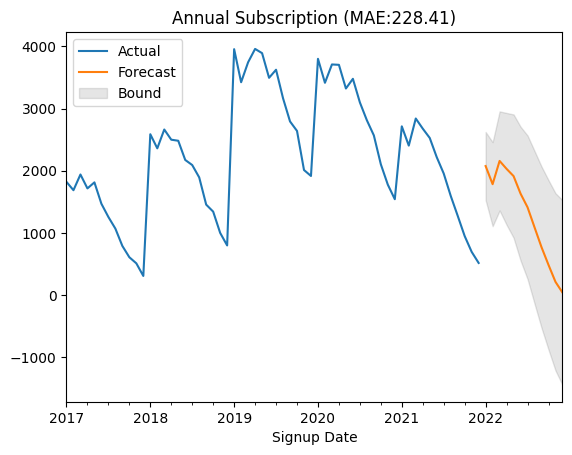

Forecast of New Customers (Annual Subscription) in 2022: 15602
Forecast of Revenue (Annual Subscription) in 2022: 18722400 $


In [19]:
# Getting a forecast for the next 12 periods and extracting summary statistics
sarimax_train_annual_forecasting = sarimax_train_annual_predict.get_forecast(12).summary_frame()

# Plotting the actual values against the forecasted values
pivot_train["Annual Subscription"].plot(label="Actual")  # Plotting actual data
sarimax_train_annual_forecasting["mean"].plot(label="Forecast")  # Plotting forecasted mean values
plt.fill_between(sarimax_train_annual_forecasting.index, sarimax_train_annual_forecasting['mean_ci_lower'], sarimax_train_annual_forecasting['mean_ci_upper'], color='k', alpha=0.1, label="Bound")
# Filling area between upper and lower confidence intervals for the forecast
plt.legend(loc="upper left")  # Adding legend to the plot
plt.title("Annual Subscription (MAE:{})".format(round(sarimax_train_annual_predict.mae, 2)))  # Setting the plot title
plt.show()  # Displaying the plot

# Printing the forecasted number of new customers for the annual subscription in 2022
print("Forecast of New Customers (Annual Subscription) in 2022:", int(sarimax_train_annual_forecasting["mean"].sum()))
# Printing the forecasted revenue for the annual subscription in 2022
print("Forecast of Revenue (Annual Subscription) in 2022:", int(sarimax_train_annual_forecasting["mean"].sum()) * 1200, "$")

From the Forecast results above, the SARIMAX model has provided a prediction for the number of new customers for annual subscriptions in 2022 of 15,602 customers with estimated revenue of $18,722,400. Plot visualization also provides a comparison between actual and predicted data, as well as confidence intervals for these predictions.

### - Monthly Subscription

The next step is to create and train the SARIMAX model using monthly subscription customer data ('Monthly Subscription') from the training data (pivot_train['Monthly Subscription']).

In [20]:
# Train the SARIMAX model using 'Monthly Subscription' data in pivot_train
sarimax_train_monthly = SARIMAX(pivot_train['Monthly Subscription'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarimax_train_monthly_predict = sarimax_train_monthly.fit()
# statistics of the model
sarimax_train_monthly_predict.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:               Monthly Subscription   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -381.220
Date:                            Fri, 08 Dec 2023   AIC                            772.441
Time:                                    00:27:56   BIC                            781.692
Sample:                                01-01-2017   HQIC                           775.922
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5359      0.867      0.618      0.537      -1.164       2.235
ma.L1         -0.4082      0.952     -0.429      0.668      -2.275       1.458
ar.S.L12       0.7542      0.822      0.918      0.359      -0.857       2.365
ma.S.L12       0.1643      1.309      0.126      0.900      -2.401       2.729
sigma2      6.044e+05   1.26e+05      4.795      0.000    3.57e+05    8.51e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):              1341.37
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):             200.24   Skew:                             4.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From the results above, it is found that the SARIMAX model which has been trained for monthly subscription customer data may not suit the data because some parameters are not statistically significant. Reconsideration is needed regarding the selection of model parameters or other approaches for more accurate analysis.

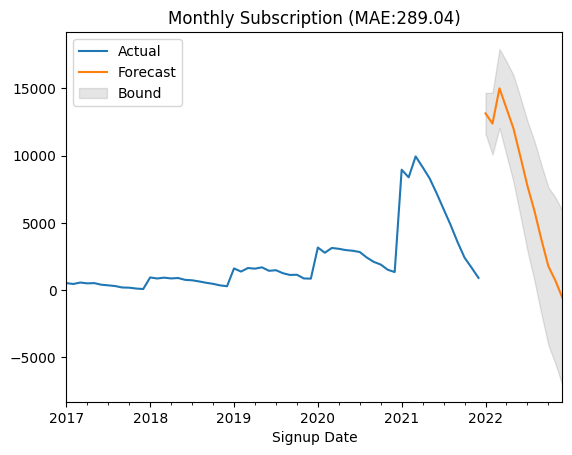

Forecast of New Customers (Monthly Subscription) in 2022: 95294
Forecast of Revenue (Monthly Subscription) in 2022: 11911750 $


In [21]:
# Getting a forecast for the next 12 periods and extracting summary statistics
sarimax_train_monthly_forecasting = sarimax_train_monthly_predict.get_forecast(12).summary_frame()

# Plotting the actual values against the forecasted values
pivot_train["Monthly Subscription"].plot(label="Actual")  # Plotting actual data
sarimax_train_monthly_forecasting["mean"].plot(label="Forecast")  # Plotting forecasted mean values
plt.fill_between(sarimax_train_monthly_forecasting.index, sarimax_train_monthly_forecasting['mean_ci_lower'], sarimax_train_monthly_forecasting['mean_ci_upper'], color='k', alpha=0.1, label="Bound")
# Filling area between upper and lower confidence intervals for the forecast
plt.legend(loc="upper left")  # Adding legend to the plot
plt.title("Monthly Subscription (MAE:{})".format(round(sarimax_train_monthly_predict.mae, 2)))  # Setting the plot title
plt.show()  # Displaying the plot

# Printing the forecasted number of new customers for the monthly subscription in 2022
print("Forecast of New Customers (Monthly Subscription) in 2022:", int(sarimax_train_monthly_forecasting["mean"].sum()))
# Printing the forecasted revenue for the monthly subscription in 2022
print("Forecast of Revenue (Monthly Subscription) in 2022:", int(sarimax_train_monthly_forecasting["mean"].sum()) * 125, "$")

From the forecast results we can conclude that the SARIMAX model has provided a prediction of the number of new subscribers for monthly subscriptions in 2022 of 95,294 subscribers with estimated revenue of $11,911,750. Plot visualization also provides a comparison between actual and predicted data, as well as confidence intervals for these predictions.

## B. Arima

The next step is to calculate using the ARIMA model, which is very useful in analyzing and forecasting time series data which has autoregressive, moving average components, as well as changes in data structure over time.

### - Annual Subscription

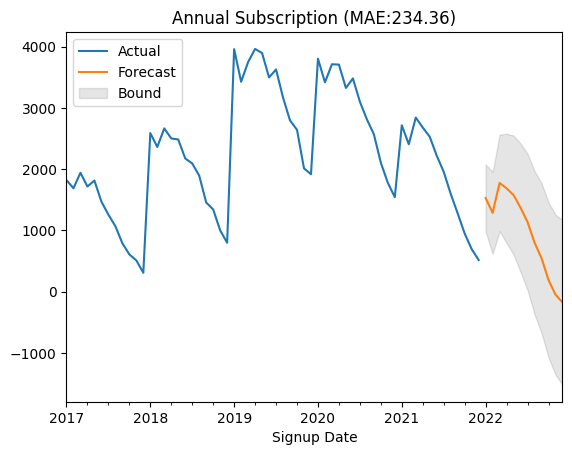

Forecast of New Customers (Annual Subscription) in 2022: 11670
Forecast of Revenue (Annual Subscription) in 2022: 14004000 $


In [22]:
# Creating a ARIMA model with specified order and seasonal order
arima_train_annual = sm.tsa.arima.ARIMA(pivot_train['Annual Subscription'], order=(12,1,1))
arima_train_annual_predict = arima_train_annual.fit()

# Getting a forecast for the next 12 periods and extracting summary statistics
arima_train_annual_forecasting = arima_train_annual_predict.get_forecast(12).summary_frame()

# Plotting the actual values against the forecasted values
pivot_train["Annual Subscription"].plot(label="Actual")  # Plotting actual data
arima_train_annual_forecasting["mean"].plot(label="Forecast")  # Plotting forecasted mean values
plt.fill_between(arima_train_annual_forecasting.index, arima_train_annual_forecasting['mean_ci_lower'], arima_train_annual_forecasting['mean_ci_upper'], color='k', alpha=0.1, label="Bound")

# Filling area between upper and lower confidence intervals for the forecast
plt.legend(loc="upper left")
plt.title("Annual Subscription (MAE:{})".format(round(arima_train_annual_predict.mae, 2)))  # Setting the plot title
plt.show()

# Printing the forecasted number of new customers for the annual subscription in 2022
print("Forecast of New Customers (Annual Subscription) in 2022:", int(arima_train_annual_forecasting["mean"].sum()))
# Printing the forecasted revenue for the annual subscription in 2022
print("Forecast of Revenue (Annual Subscription) in 2022:", int(arima_train_annual_forecasting["mean"].sum()) * 1200, "$")

From the forecast results above, it is found that the ARIMA model has provided a prediction of the number of new customers for annual subscriptions in 2022 of 11,670 customers with estimated revenue of $14,004,000.

Plot visualization also provides a comparison between actual and predicted data, as well as confidence intervals for these predictions. This information is useful for evaluating business projections for annual subscriptions in the coming year.

### - Monthly Subscription

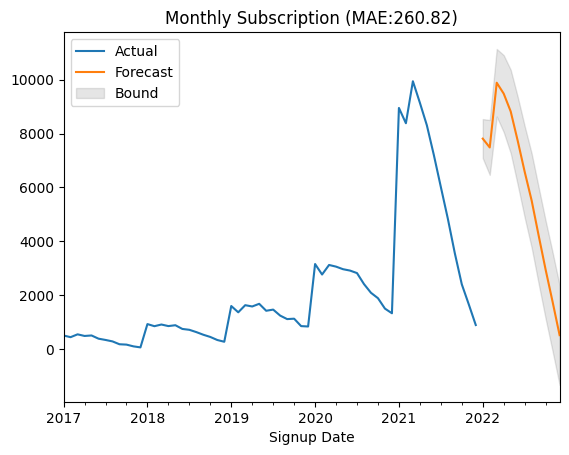

Forecast of New Customers (Monthly Subscription) in 2022: 72772
Forecast of Revenue (Monthly Subscription) in 2022: 9096500 $


In [23]:
# Creating a ARIMA model with specified order and seasonal order
arima_train_monthly = sm.tsa.arima.ARIMA(pivot_train['Monthly Subscription'], order=(12,1,1))
arima_train_monthly_predict = arima_train_monthly.fit()

# Getting a forecast for the next 12 periods and extracting summary statistics
arima_train_monthly_forecasting = arima_train_monthly_predict.get_forecast(12).summary_frame()

# Plotting the actual values against the forecasted values
pivot_train["Monthly Subscription"].plot(label="Actual")  # Plotting actual data
arima_train_monthly_forecasting["mean"].plot(label="Forecast")  # Plotting forecasted mean values
plt.fill_between(arima_train_monthly_forecasting.index, arima_train_monthly_forecasting['mean_ci_lower'], arima_train_monthly_forecasting['mean_ci_upper'], color='k', alpha=0.1, label="Bound")
# Filling area between upper and lower confidence intervals for the forecast
plt.legend(loc="upper left")  # Adding legend to the plot
plt.title("Monthly Subscription (MAE:{})".format(round(arima_train_monthly_predict.mae, 2)))  # Setting the plot title
plt.show()  # Displaying the plot

# Printing the forecasted number of new customers for the monthly subscription in 2022
print("Forecast of New Customers (Monthly Subscription) in 2022:", int(arima_train_monthly_forecasting["mean"].sum()))
# Printing the forecasted revenue for the monthly subscription in 2022
print("Forecast of Revenue (Monthly Subscription) in 2022:", int(arima_train_monthly_forecasting["mean"].sum()) * 125, "$")

From the forecast results above, it is found that the ARIMA model has provided a prediction of the number of new customers for monthly subscriptions in 2022 of 72,772 customers with an estimated income of $9,096,500.

Plot visualization provides a comparative overview between actual and predicted data, as well as confidence intervals for the predictions. This information can be used to evaluate business projections for monthly subscriptions in the coming year.

---

# Model Evaluation

In this evaluation model we will predict from the `Sarimax` and `Arima` models

## 1. Sarimax

In this step we make predictions for the next 12 periods using the SARIMAX model that has been trained previously.

In [24]:
# Generating forecasted values ('y_pred') using SARIMAX model for the next 12 periods based on the test set
y_pred = pd.Series(sarimax_train_annual_predict.forecast(12)[0], index=pivot_test['Annual Subscription'].index)

# Retrieving true values ('y_true') for the Annual Subscription from the test set
y_true = pivot_test['Annual Subscription']

# Calculating Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))

# Calculating Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_pred - y_true))

# Calculating Mean Percentage Error (MPE)
mpe = np.mean((y_pred - y_true) / y_true)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.mean((y_pred - y_true) ** 2) ** 0.5

# Calculating Pearson correlation coefficient between forecasted and true values
corr = np.corrcoef(y_pred, y_true)[0, 1]

# Displaying evaluation metrics (MAPE, MAE, MPE, RMSE, and Correlation) for the forecast
pprint.pprint({'mape': mape, 'mae': mae, 'mpe': mpe, 'rmse': rmse, 'corr': corr})

{'corr': nan,
 'mae': 1516.7818072608763,
 'mape': 4.248790878863199,
 'mpe': 4.248790878863199,
 'rmse': 1536.3347023042331}


From the prediction results, the SARIMAX model has a relatively low error rate, with a MAPE of around 4.25%, indicating fairly accurate predictions in estimating the number of new customers for annual subscriptions in the testing dataset. However, the correlation between predictions and actual data cannot be calculated. This evaluation provides an overview of the general performance of the model in making predictions.

## 2. Arima

In this step we make predictions for the next 12 periods using a previously trained ARIMA model.

In [25]:
# Generating forecasted values ('y_pred') using ARIMA model for the next 12 periods based on the test set
y_pred = pd.Series(arima_train_annual_predict.forecast(12)[0], index=pivot_test['Annual Subscription'].index)

# Retrieving true values ('y_true') for the Annual Subscription from the test set
y_true = pivot_test['Annual Subscription']

# Calculating Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))

# Calculating Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_pred - y_true))

# Calculating Mean Percentage Error (MPE)
mpe = np.mean((y_pred - y_true) / y_true)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.mean((y_pred - y_true) ** 2) ** 0.5

# Calculating Pearson correlation coefficient between forecasted and true values
corr = np.corrcoef(y_pred, y_true)[0, 1]

# Displaying evaluation metrics (MAPE, MAE, MPE, RMSE, and Correlation) for the forecast
pprint.pprint({'mape': mape, 'mae': mae, 'mpe': mpe, 'rmse': rmse, 'corr': corr})

{'corr': 0.0,
 'mae': 969.2663042217753,
 'mape': 2.864351354277529,
 'mpe': 2.864351354277529,
 'rmse': 999.5871323533559}


The prediction results in the ARIMA model show a relatively low error rate, with a MAPE of around 2.86%, indicating good predictive ability in estimating the number of new customers for annual subscriptions in the testing dataset. However, a low correlation value indicates that the linear relationship between predictions and actual data does not exist or is very weak. This evaluation provides an overview of the general performance of the model in making predictions.

---

# Model Saving

The final step is that we save the model by using the pickle module to save the ARIMA model into a file.

In [26]:
# Save the model using pickle
with open('annual_model.pkl', 'wb') as file_1:
    pickle.dump(arima_train_annual_predict, file_1)

with open('monthly_model.pkl', 'wb') as file_2:
    pickle.dump(arima_train_annual_predict, file_2)

The save model function is to save the trained model to a file, which can later be used again without having to retrain the model. This makes it possible to save the model and then reload it in the future without having to run a retraining process.

---

# Conclusion

**Data Explanation**

From the information above, we can conclude that the data obtained contains :
- There are 24 columns
- Type Float(64) 3 columns, Integer(64) 11 columns and object 10 columns
- Has 330512 rows.

**Conclusion :** 
From the prediction results of both models, it can be seen that ARIMA shows better performance in predicting the number of new customers for annual subscriptions in the testing dataset. Although both models show relatively low error rates (SARIMAX about 4.25% and ARIMA about 2.86% MAPE), ARIMA has better correlation values (0.0 for SARIMAX and low for ARIMA). In general, ARIMA is superior because it has a lower or close to zero level of correlation, indicating a better match between predictions and actual data. However, in the context of model selection, it is also important to consider other factors such as the suitability of the model to other data, the complexity of the model, and specific business needs.

---